In [15]:
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import math
from astropy import time, coordinates as coord, units as u
import requests
import matplotlib.dates as mdates
from pandas.plotting import table

Path to PixInsight photometry result files

In [16]:
target="HAT-P-12"
path="D:\\Astronomie\\SharpCap Captures\\HAT P 12 b\\Work\\photometry"
filelist=os.listdir(path)

Get AAVSO data from target variable

In [23]:
response = requests.get(f"http://www.aavso.org/vsx/index.php?view=api.object&ident={target}&format=json")   
vsx_data=response.json()['VSXObject']
vsx_data

{'Name': 'HAT-P-12',
 'AUID': '000-BKN-997',
 'RA2000': '209.38946',
 'Declination2000': '43.49353',
 'VariabilityType': 'EP',
 'Period': '3.2130598',
 'Epoch': '2454419.196',
 'EclipseDuration': '3.03',
 'MaxMag': '12.84 V',
 'MinMag': '(0.020) V',
 'Category': 'Variable',
 'OID': '232803',
 'Constellation': 'CVn'}

In [24]:
constellation=vsx_data['Constellation']
star=vsx_data['Name']
period= vsx_data['Period']
position = coord.SkyCoord(vsx_data['RA2000'],vsx_data['Declination2000'],
                        unit=(u.deg, u.deg), frame='icrs')
observatory = coord.EarthLocation.of_address('muelheim')

Get Photometry field from AAVSO

In [31]:
response = requests.get(f"https://www.aavso.org/vsp/api/chart/?star={star}&fov=60&maglimit=15&format=json")
chart_data=response.json()
chart_data

{'chartid': 'X36856HB',
 'image_uri': 'https://app.aavso.org/vsp/chart/X36856HB.png?format=json',
 'star': 'HAT-P-12',
 'fov': 60.0,
 'maglimit': 15.0,
 'title': '',
 'comment': '',
 'resolution': 150,
 'dss': False,
 'special': None,
 'photometry': [{'auid': '000-BLT-544',
   'ra': '13:55:55.60',
   'dec': '43:29:42.5',
   'label': '108',
   'bands': [{'band': 'V', 'mag': 10.769, 'error': 0.019},
    {'band': 'B', 'mag': 11.864, 'error': 0.032},
    {'band': 'Rc', 'mag': 10.219, 'error': 0.034},
    {'band': 'Ic', 'mag': 9.706, 'error': 0.044}],
   'comments': ''},
  {'auid': '000-BLT-545',
   'ra': '13:58:27.68',
   'dec': '43:14:07.7',
   'label': '116',
   'bands': [{'band': 'V', 'mag': 11.556, 'error': 0.023},
    {'band': 'B', 'mag': 12.209, 'error': 0.041},
    {'band': 'Rc', 'mag': 11.163, 'error': 0.047},
    {'band': 'Ic', 'mag': 10.794, 'error': 0.062}],
   'comments': ''},
  {'auid': '000-BLT-546',
   'ra': '13:58:07.86',
   'dec': '43:22:45.8',
   'label': '124',
   'bands

In [32]:
auid_list = []
for photometry_data in chart_data['photometry']:
    auid = photometry_data['auid']
    ra=photometry_data['ra']
    dec=photometry_data['dec']
    for band_data in photometry_data['bands']:
        if band_data['band'] == 'V':
            mag = band_data['mag']
            auid_list.append((auid, ra, dec, mag))

In [33]:
auid_list

[('000-BLT-544', '13:55:55.60', '43:29:42.5', 10.769),
 ('000-BLT-545', '13:58:27.68', '43:14:07.7', 11.556),
 ('000-BLT-546', '13:58:07.86', '43:22:45.8', 12.445),
 ('000-BLT-547', '13:57:22.64', '43:35:48.4', 12.626),
 ('000-BLT-548', '13:56:34.02', '43:26:02.6', 12.65),
 ('000-BLT-549', '13:57:10.59', '43:24:35.8', 12.924),
 ('000-BLT-550', '13:57:24.99', '43:31:33.6', 13.13),
 ('000-BLT-551', '13:57:16.64', '43:26:53.2', 13.314),
 ('000-BLT-552', '13:57:32.96', '43:33:46.1', 13.939)]

In [5]:
varstar="3UCAC310-119181"
check="3UCAC311-110043"
compstar=["3UCAC311-110125","3UCAC310-119077","3UCAC310-119007"]
compstar_mag=[8.970,9.589,10.222]

In [6]:
file=filelist[0]
df=pd.read_csv(path+"\\"+file,sep=";",skiprows=5)
df

,DATE_OBS,NAME,FILTER,CATRA,CATDEC,IMGRA,IMGDEC,IMGX,IMGY,f.mag,...,SNR9,SNR10,SNR11,SNR12,SNR13,SNR14,SNR15,SNR16,SNR17,FLAG
0,2.460212e+06,3UCAC310-119695,Johnson V,340.571200,64.872053,340.571318,64.872002,3090.462,2910.911,6.793,...,1536.82600,1554.59700,1566.54500,1574.32100,1579.42000,1582.47500,1583.94800,1584.19500,1583.47900,10
1,2.460212e+06,3UCAC311-109367,Johnson V,339.178356,65.257480,339.178091,65.257624,317.769,1894.555,7.411,...,1417.13900,1430.14200,1438.36900,1443.00000,1445.52400,1446.52600,1446.47500,1445.41600,1443.50500,10
2,2.460212e+06,3UCAC311-110091,Johnson V,340.158571,65.262680,340.158582,65.262462,1333.508,3288.659,8.269,...,1055.00700,1060.70400,1063.52000,1063.93200,1063.02800,1061.00200,1058.18900,1054.55600,1050.39800,13
3,2.460212e+06,3UCAC311-110092,Johnson V,340.159304,65.262716,340.158582,65.262462,1333.508,3288.659,8.330,...,1055.00700,1060.70400,1063.52000,1063.93200,1063.02800,1061.00200,1058.18900,1054.55600,1050.39800,17
4,2.460212e+06,3UCAC311-110125,Johnson V,340.216384,65.215154,340.216535,65.215137,1554.907,3252.313,8.782,...,876.18600,879.17040,879.52310,878.23140,875.67270,872.24980,868.05320,863.26630,857.94700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2.460212e+06,3UCAC310-119306,Johnson V,340.000085,64.726196,340.000131,64.726151,2981.642,1724.690,13.974,...,38.13096,35.92999,33.80836,31.47062,29.21096,27.38821,25.91700,24.84656,23.79730,0
280,2.460212e+06,3UCAC311-109563,Johnson V,339.415532,65.271743,339.415311,65.271776,522.510,2263.272,13.976,...,38.59545,35.65277,32.95314,30.50154,28.61177,26.86494,25.26053,23.72438,22.24845,0
281,2.460212e+06,3UCAC310-118914,Johnson V,339.405188,64.964160,339.405210,64.964140,1545.303,1471.058,13.986,...,39.23128,36.70205,33.92263,31.39887,29.24945,27.55502,26.31806,25.07034,23.99070,0
282,2.460212e+06,3UCAC311-110122,Johnson V,340.212755,65.196181,340.212785,65.196208,1615.286,3199.872,13.994,...,32.55735,30.66523,28.97447,27.07059,25.08720,23.12757,21.50209,20.31231,19.20977,0


In [7]:
t0=df.iloc[0,0]
t0_iso=time.Time(t0,format="jd")

In [8]:
l=[]
for s in df.iloc[:,1]: l=l+[s.strip()]
df.iloc[:,1]=l

In [9]:
def snrlst(target,infiles):
    target_snr=[]
    for file in infiles:
        df=pd.read_csv(path+"\\"+file,sep=";",skiprows=5)
         #find target star
        l=[]
        for s in df.iloc[:,1]: l=l+[s.strip()]
        df.iloc[:,1]=l
        itarget=(df.iloc[:,1]==target)
        target_snr=target_snr+[df.loc[itarget]]
    target_snr=pd.concat(target_snr,ignore_index=True)
    ind=[]
    col=target_snr.columns.to_list()
    for s in col:
        ind = ind + [s.startswith("SNR")]
    target_snr=target_snr.loc[:,ind]
    return target_snr.mean()

In [10]:
snr=snrlst(varstar,filelist)
snrmax=snr.idxmax()
labelflux=snrmax.replace("SNR","FLUX")
labelflux

'FLUX11   '

In [11]:
def fluxcalc(target,infiles):
    target_flux=pd.DataFrame()
    for file in infiles:
        #read file
        df=pd.read_csv(path+"\\"+file,sep=";",skiprows=5)
        #find target star
        l=[]
        for s in df.iloc[:,1]: l=l+[s.strip()]
        df.iloc[:,1]=l
        itarget=(df.iloc[:,1]==target)
        #find max. SNR
        data=df.loc[itarget]
        col=data.columns.to_list()
        ind=[]
        for s in col:
             ind = ind + [s.startswith("SNR")]
        snr=data.loc[:,ind]
        #find corresponding flux label
        label_snr=snr.idxmax(axis="columns").iloc[0]
        label_flux=label_snr.replace("SNR","FLUX")
        #read flux
        flux=df.loc[itarget][['DATE_OBS     ',label_flux]]
        flux=flux.rename(columns={'DATE_OBS     ':"DATE_OBS",label_flux:"FLUX"})
        target_flux=pd.concat([target_flux,flux])
    return target_flux

In [12]:
def fluxcalc2(target,infiles,label_max):
    target_flux=pd.DataFrame()
    for file in infiles:
        #read file
        df=pd.read_csv(path+"\\"+file,sep=";",skiprows=5)
        #find target star
        l=[]
        for s in df.iloc[:,1]: l=l+[s.strip()]
        df.iloc[:,1]=l
        itarget=(df.iloc[:,1]==target)
        #read flux
        flux=df.loc[itarget][['DATE_OBS     ',label_max]]
        flux=flux.rename(columns={'DATE_OBS     ':"DATE_OBS",label_max:"FLUX"})
        target_flux=pd.concat([target_flux,flux])
    return target_flux

In [13]:
minind=0
maxind=len(filelist)-1

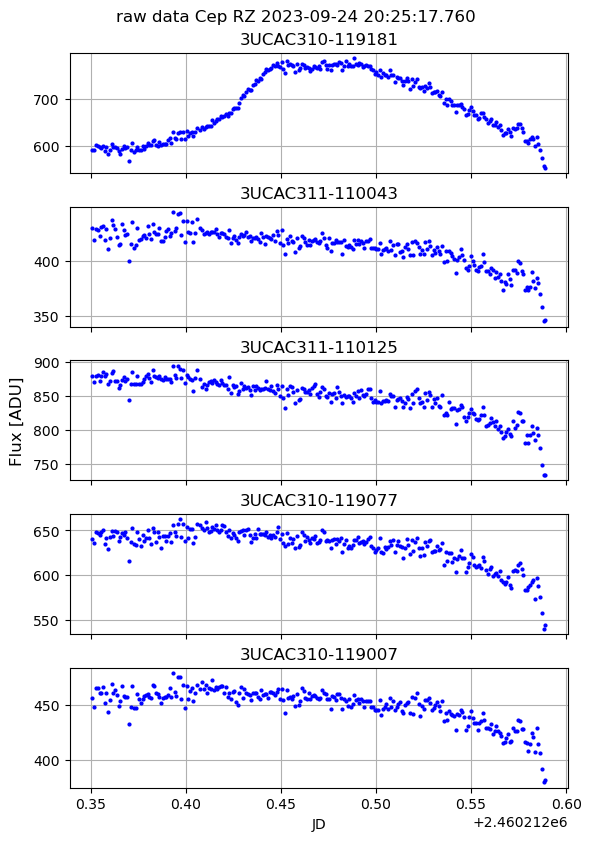

In [14]:
flux_var=fluxcalc2(varstar,filelist,snrmax)
flux_check=fluxcalc2(check,filelist,snrmax)
flux_comp1=fluxcalc2(compstar[0],filelist,snrmax)
flux_comp2=fluxcalc2(compstar[1],filelist,snrmax)
flux_comp3=fluxcalc2(compstar[2],filelist,snrmax)

t=flux_var.to_numpy()[minind:maxind,0]
mag_var=flux_var.to_numpy()[minind:maxind,1]
mag_check=flux_check.to_numpy()[minind:maxind,1]
mag_comp1=flux_comp1.to_numpy()[minind:maxind,1]
mag_comp2=flux_comp2.to_numpy()[minind:maxind,1]
mag_comp3=flux_comp3.to_numpy()[minind:maxind,1]

fig, (ax,ax1,ax2,ax3,ax4) = plt.subplots(5,1,figsize=(5.8,8.3), layout='constrained')
fig.suptitle("raw data " + constellation + " " + star + " " + t0_iso.iso )
fig.supylabel("Flux [ADU]")
ax.plot(t,mag_var,"bo",ms=2)
ax.set_title(varstar)
ax.tick_params(axis="x",labelbottom=False)
ax.grid(visible="true")
ax1.plot(t,mag_check,"bo",ms=2)
ax1.set_title(check)
ax1.grid(visible="true")
ax1.tick_params(axis="x",labelbottom=False)
ax2.plot(t,mag_comp1,"bo",ms=2)
ax2.set_title(compstar[0])
ax2.tick_params(axis="x",labelbottom=False)
ax2.grid(visible="true")
ax3.plot(t,mag_comp2,"bo",ms=2)
ax3.set_title(compstar[1])
ax3.tick_params(axis="x",labelbottom=False)
ax3.grid(visible="true")
ax4.plot(t,mag_comp3,"bo",ms=2)
ax4.set_title(compstar[2])
ax4.set_xlabel("JD")
ax4.grid(visible="true")

fig.savefig(constellation+"_"+star+"_"+'%-8.4f'%(t0_iso.to_value("jd")-2400000)+"_"+"RAW_DATA"+".pdf", format="pdf")

In [15]:
mag=-(2.5*np.log10(mag_var/mag_comp1)+2.5*np.log10(mag_var/mag_comp2)+2.5*np.log10(mag_var/mag_comp3))/3+np.mean(compstar_mag)

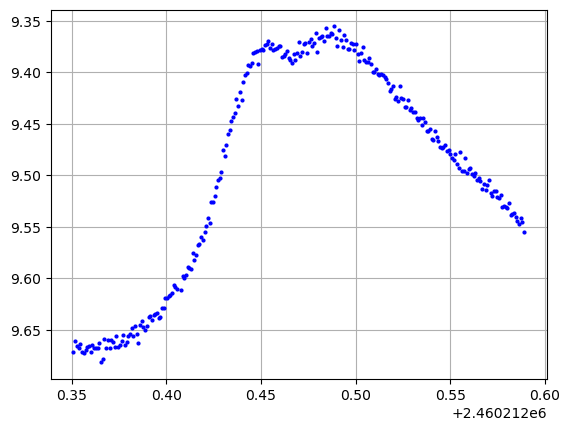

In [16]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(t,mag,"bo",ms=2)  # Plot some data on the axes.
ax.invert_yaxis()
ax.grid(visible=True)

In [17]:
mag_c=-(2.5*np.log10(mag_check/mag_comp1)+2.5*np.log10(mag_check/mag_comp2)+2.5*np.log10(mag_check/mag_comp3))/3+np.mean(compstar_mag)

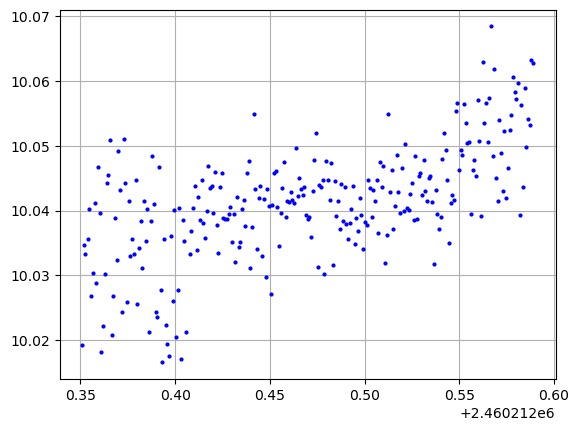

In [18]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(t,mag_c,"bo",ms=2)  # Plot some data on the axes.
ax.grid(visible=True)

In [19]:
err_c=np.std(mag_c)
err_c

0.008882295968879829

In [20]:
lc=np.empty((mag.shape[0],3))
lc[:,0]=t
lc[:,1]=mag
lc[:,2]=err_c

In [21]:
t0=int(lc[0,0])
t=lc[:,0]-t0
mag=lc[:,1]
merr=lc[:,2]

In [22]:
t0_ap=time.Time(t0,format="jd")
t0_ap.to_value("iso",subfmt="date")

'2023-09-24'

In [23]:
p=period
w=2*math.pi/p
k=8
C=np.stack([np.sin(i*w*t) for i in range(1,k+1)])
B=np.stack([np.cos(i*w*t) for i in range(k+1)])
A=np.concatenate((B,C)).T
coeff = np.linalg.lstsq(A,mag,rcond=None)[0]

In [24]:
def lc_fourier(t,w,coeff):
    n=coeff.shape[0]
    mag=0
    k=int((n-1)/2)
    for i in range(0,k+1):
        mag=mag+coeff[i]*np.cos(i*w*t)
    for i in range(k+1,n):
        mag=mag+coeff[i]*np.sin((i-k)*w*t)
    return mag

In [25]:
t_step=np.linspace(min(t),max(t),1000)

In [26]:
x=lc_fourier(t_step,w,coeff)

In [27]:
ind=sp.signal.argrelmin(x)
ind1=sp.signal.argrelmax(x)

In [28]:
ind1

(array([ 33, 484], dtype=int64),)

In [29]:
t0_ap=time.Time(t0+t_step[ind],format="jd")
t1_ap=time.Time(t0+t_step[ind1],format="jd")
t0_ap.to_value("iso")

array(['2023-09-24 22:53:13.098', '2023-09-24 23:42:17.816'], dtype='<U23')

In [30]:
ip_peg = coord.SkyCoord("23:23:08.55", "+18:24:59.3",
                        unit=(u.hourangle, u.deg), frame='icrs')
greenwich = coord.EarthLocation.of_site('greenwich')  
times = time.Time([56325.95833333, 56325.978254], format='mjd',
                  scale='utc', location=greenwich)  
ltt_bary = times.light_travel_time(ip_peg)  
ltt_bary 

<TimeDelta object: scale='tdb' format='jd' value=[-0.0037715  -0.00377286]>

In [31]:
t0_ap = time.Time(t0+t_step[ind],format="jd",
                  scale='utc', location=observatory)  
t1_ap=time.Time(t0+t_step[ind1],format="jd",
                  scale="utc",location=observatory)
ltt0_helio = t0_ap.light_travel_time(position,"heliocentric") 
ltt1_helio = t1_ap.light_travel_time(position,"heliocentric") 
ltt0_helio.to_value("jd") 

array([0.00236191, 0.00236261])

In [32]:
time.Time(t0+t_step[ind],format="jd",
                  scale='utc', location=observatory)  

<Time object: scale='utc' format='jd' value=[2460212.45362382 2460212.48770621]>

In [33]:
position

<SkyCoord (ICRS): (ra, dec) in deg
    (339.80491667, 64.59491667)>

In [34]:
t_am=time.Time(t0+t_step,format="jd",scale="utc",location=observatory)
frame=coord.AltAz(obstime=t_am,location=observatory)
airmass=position.transform_to(frame).secz
[airmass[0],airmass[999],np.min(airmass)]

[<Quantity 1.0511851>, <Quantity 1.20527414>, <Quantity 1.02752979>]

In [35]:
description=[["Maximum (UTC, geocentric)",t0_ap[0].to_value("iso")],
             ["Maximum (HJD, time base UTC)",'%-8.4f'%(t0_ap[0].to_value("jd")+ltt0_helio[0].to_value("jd"))+"+/-0.002"],
             ["Maximum (UTC, geocentric)",t0_ap[1].to_value("iso")],
             ["Maximum (HJD, time base UTC)",'%-8.4f'%(t0_ap[1].to_value("jd")+ltt0_helio[1].to_value("jd"))+"+/-0.002"],
             ["Minimum (UTC, geocentric)",t1_ap[0].to_value("iso")],
             ["Minimim (HJD, time base UTC)",'%-8.4f'%(t1_ap[0].to_value("jd")+ltt1_helio[0].to_value("jd"))+"+/-0.002"],
             ["Minimum (UTC, geocentric)",t1_ap[1].to_value("iso")],
             ["Minimim (HJD, time base UTC)",'%-8.4f'%(t1_ap[1].to_value("jd")+ltt1_helio[1].to_value("jd"))+"+/-0.002"],
             ["Observer","Deeskow, DES"],
             ["Instrumnent","CFF140 f/6.6, ASI1600mm with V Filter"],
             ["Comparison Star",compstar[0]],
             ["",compstar[1]],
             ["",compstar[2]],
             ["Photometry","PixInsight Photometry Skript"],
             ["Evaluation","Fourier-Fit"],
             ["Airmass","1.125 ... 1.028 ... 1.245"],
             ["Number of Measurements",str(lc.shape[0])]
            ]
title=star + " " + constellation+"             "+t0_ap[0].to_value("iso",subfmt="date")

In [36]:
tiso=time.Time(t0+t,format="jd")
t_step_iso=time.Time(t0+t_step,format="jd")
jd0=t_step_iso[0].jd

In [37]:
mpl0=mpl.dates.date2num(t_step_iso[0].datetime)

In [38]:
def jd2mpl(tin):
    tout=tin+mpl0-jd0-ltt0_helio[0].to_value("jd")+int(jd0)
    return tout

In [39]:
def mpl2jd(tin):
    tout=tin-mpl0+jd0+ltt0_helio[0].to_value("jd")-int(jd0) 
    return tout

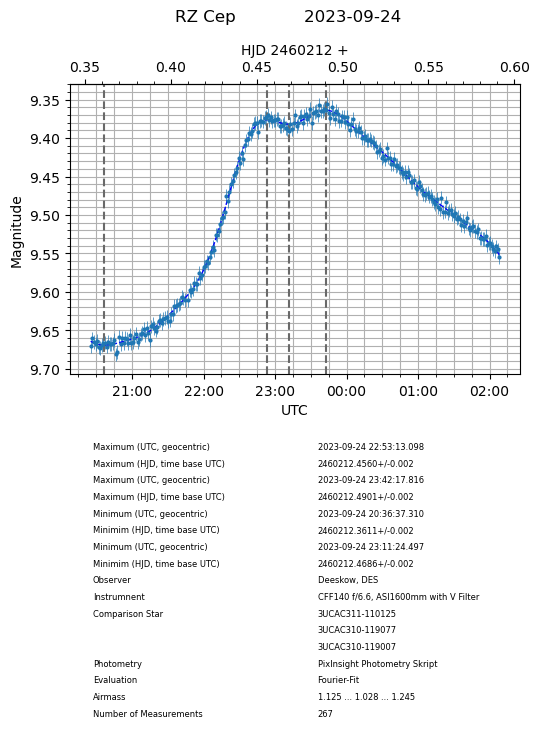

In [40]:
fig, (ax,ax1) = plt.subplots(2,1,height_ratios=[1,1],figsize=(5.8,8.3))
fig.suptitle(title,x=0.5,y=0.97,ha="center")
ax.clear()
ax.errorbar(tiso.datetime,mag,yerr=merr,elinewidth=0.5,marker="o",ms=2,linestyle="none")
ax.plot(t_step_iso.datetime,lc_fourier(t_step,w,coeff),"b--",linewidth=1)  
for i in ind[0]:
    ax.axvline(t_step_iso[i].datetime,0,1,color='dimgrey',ls="--")
for i in ind1[0]:
    ax.axvline(t_step_iso[i].datetime,0,1,color='dimgrey',ls="--")
ax.invert_yaxis()
ax.minorticks_on()
ax.grid(visible=True,which="both")
ax.set_xlabel("UTC")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#ax.set_xlabel("JD "+'%-8.0f'%(int(t0_ap.to_value("jd"))))
ax.set_ylabel("Magnitude")

secax = ax.secondary_xaxis('top', functions=(mpl2jd,jd2mpl))
secax.set_xlabel('HJD'+" "+str(int(jd0))+" +")
#pticks=ax.get_xticks()
#secax.set_xticks(mpl2jd(pticks))
secax.minorticks_on()

ax1.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labeltop=False,
    labelleft=False,
    labelright=False)
ax1.set_axis_off()
ax1.table(description,loc="upper center",cellLoc="left",edges="")

fig.savefig(constellation+"_"+star+"_"+'%-8.4f'%(t0_ap[1].jd-2400000+ltt0_helio[1].to_value("jd"))+"_"+"DES"+".pdf", format="pdf")
    

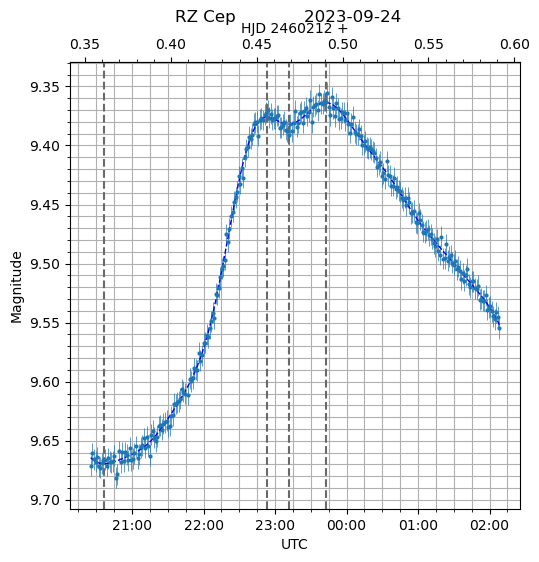

In [41]:
fig, ax = plt.subplots(1,1,height_ratios=[1],figsize=(5.8,5.8))
fig.suptitle(title,x=0.5,y=0.97,ha="center")
ax.clear()
ax.errorbar(tiso.datetime,mag,yerr=merr,elinewidth=0.5,marker="o",ms=2,linestyle="none")
ax.plot(t_step_iso.datetime,lc_fourier(t_step,w,coeff),"b--",linewidth=1)  
for i in ind[0]:
    ax.axvline(t_step_iso[i].datetime,0,1,color='dimgrey',ls="--")
for i in ind1[0]:
    ax.axvline(t_step_iso[i].datetime,0,1,color='dimgrey',ls="--")
ax.invert_yaxis()
ax.minorticks_on()
ax.grid(visible=True,which="both")
ax.set_xlabel("UTC")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#ax.set_xlabel("JD "+'%-8.0f'%(int(t0_ap.to_value("jd"))))
ax.set_ylabel("Magnitude")

secax = ax.secondary_xaxis('top', functions=(mpl2jd,jd2mpl))
secax.set_xlabel('HJD'+" "+str(int(jd0))+" +")
#pticks=ax.get_xticks()
#secax.set_xticks(mpl2jd(pticks))
secax.minorticks_on()


fig.savefig(constellation+"_"+star+"_"+'%-8.4f'%(t0_ap[1].jd-2400000+ltt0_helio[1].to_value("jd"))+"_"+"DES"+".png", format="png")
    

In [42]:
maxlist=[]
for i in range(t0_ap.shape[0]): 
    maximum=[constellation,
         star,
         "max",
         '%-8.4f'%(t0_ap[i].to_value("jd")),
         '%-8.4f'%(t0_ap[i].to_value("jd")+ltt0_helio[i].to_value("jd")),
         '0.002',
         "na",
         "na",
         '%-6.3f'%(lc_fourier(t0_ap[i].jd-t0,w,coeff)),
         "C",
         "ASI1600MM",
         "G",
         str(lc.shape[0]),
         "DES",
         "na"
        ]
    maxout=""
    for entry in maximum:
        maxout=maxout+entry+"|"
    maxlist=maxlist+[maxout]   
        
maxlist

['Cep|RZ|max|2460212.4536|2460212.4560|0.002|na|na|9.376 |C|ASI1600MM|G|267|DES|na|',
 'Cep|RZ|max|2460212.4877|2460212.4901|0.002|na|na|9.364 |C|ASI1600MM|G|267|DES|na|']

In [43]:
minlist=[]
for i in range(t1_ap.shape[0]):
    minimum=[constellation,
         star,
         "min",
         '%-8.4f'%(t1_ap[i].to_value("jd")),
         '%-8.4f'%(t1_ap[i].to_value("jd")+ltt1_helio[i].to_value("jd")),
         '0.002',
         "na",
         "na",
         '%-6.3f'%(lc_fourier(t1_ap[i].jd-t0,w,coeff)),
         "C",
         "ASI1600MM",
         "V",
         str(lc.shape[0]),
         "DES",
         "na"
        ]
    minout=""
    for entry in minimum:
        minout=minout+entry+"|"
    minlist=minlist+[minout]  
minlist

['Cep|RZ|min|2460212.3588|2460212.3611|0.002|na|na|9.669 |C|ASI1600MM|V|267|DES|na|',
 'Cep|RZ|min|2460212.4663|2460212.4686|0.002|na|na|9.382 |C|ASI1600MM|V|267|DES|na|']

In [44]:
f=open(constellation+"_"+star+"_"+'%-8.4f'%(t0_ap[i].jd-2400000+ltt0_helio[i].to_value("jd"))+"_"+"DES"+"_MiniMax"+".txt","w")
f.write("#TYPE=BAVMiniMax")
f.write("\n")
f.write("#Delim=|")
f.write("\n")
for line in maxlist:
    f.write(line)
    f.write("\n")
for line in minlist:
    f.write(line)
    f.write("\n")
f.close()

In [45]:
np.savetxt(constellation+"_"+star+"_"+'%-8.4f'%(t0_ap[0].jd-2400000+ltt0_helio[0].to_value("jd"))+"_"+"DES"+"_BAVReport"+".txt",lc,fmt="%-8.4f",header="BAV-Report"+"\n"+"Rem=")

In [46]:
data=np.array([(2442635.374,2448500.0334,2454388.5221),(0.30864291,0.3086876,0.308626840)])
data=np.transpose(data)

In [47]:
elements=pd.DataFrame(data,columns=["epoch","period"],index=["AAVSO","GCVS","BAV"])

In [48]:
elements

,epoch,period
AAVSO,2.442635e+06,0.308643
GCVS,2.448500e+06,0.308688
BAV,2.454389e+06,0.308627


In [49]:
tmax=(t0_ap[1].to_value("jd")+ltt0_helio[1].to_value("jd"))

In [50]:
oc=pd.DataFrame(data=None,index=["AAVSO","GCVS","BAV"],columns=["O-C"])
for dataset in elements.itertuples():
    e=int((tmax-dataset.epoch)/dataset.period)
    oc0=tmax-(dataset.epoch+e*dataset.period)
    oc1=tmax-(dataset.epoch+(e+1)*dataset.period)
    if abs(oc0) < abs(oc1):
        oc.loc[dataset.Index]["O-C"]=oc0
    else:
        oc.loc[dataset.Index]["O-C"]=oc1
oc

,O-C
AAVSO,-0.097656
GCVS,-0.076938
BAV,-0.129129


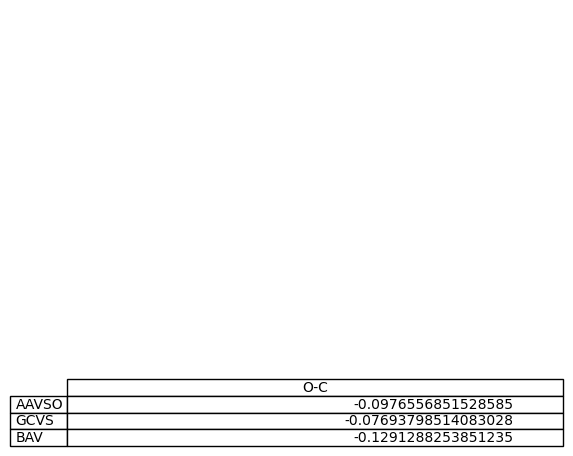

In [51]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, oc)  # where df is your data frame

plt.show()

In [31]:
pip install astropy

Note: you may need to restart the kernel to use updated packages.
